In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plit
%matplotlib inline

In [12]:
with open('test.csv', 'r') as csvfile:
    lines = csv.reader(csvfile)
    for row in lines:
        print(', '.join(row))

ï»¿hour, latitude, longitude, magn
16, 36.6966, 71.0477, 4.1
15, 34.3875, 70.49, 4.2
14, 19.5466, 144.5567, 5.1
6, 34.5506, 140.1244, 4.7
19, 39.1276, 142.3716, 4.7
8, 40.8987, 141.3748, 4.6
21, 36.6706, 70.8862, 4.3
14, 41.104, 143.3093, 4.3
13, 30.0593, 70.3816, 4.1
4, 39.7671, 74.4116, 4.2
22, 44.3444, 140.9769, 4.2
19, 45.02, 147.6023, 4.3
15, 27.9852, 92.5815, 4.8
8, 36.1883, 70.4385, 4.7
2, 36.5512, 70.5232, 4.3
3, 23.5476, 94.32, 4.5
0, 41.4349, 143.1458, 4.4
17, 27.4987, 142.3556, 4.7
14, 35.8167, 68.6819, 4.9
11, 36.5401, 141.0175, 4.7
10, 27.1973, 96.929, 5.3
7, 19.3496, 145.6536, 4.7
2, 41.3502, 143.1771, 5.4
21, 40.3755, 142.706, 4.4
14, 48.3806, 154.9629, 4.9
11, 36.6789, 70.9492, 4.2
23, 36.0703, 139.7598, 4.8
22, 37.5114, 141.4814, 4.3
13, 38.8713, 141.8403, 4.5
5, 50.0727, 156.142, 4.6
3, 18.8026, 145.2569, 4.1
23, 23.4163, 118.5815, 5.7
16, 9.8575, 125.8405, 4.4
15, 42.0009, 142.7654, 4.5
23, 30.9008, 139.1172, 4.1
20, 32.2597, 141.4004, 4.2
20, 47.4133, 149.6349, 4.3


In [30]:
def sigmoid(z):
    """
    Arg:
    z -- A number or numpy array
    Return:
    a -- sigmoid(z)
    """
    a = 1 / (1 + np.exp(-z)) #Sigmoid function
    return a

In [32]:
import numpy as np
def init_zeros(dim):
    """
    Arg:
    dim -- size of w 
    
    Returns:
    w -- a numpy vector of shape (dim, 1)
    b -- a number
    """
    
    s = (dim, 1)
    w = np.zeros(s)
    b = 0.0
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [33]:
dim = 3
w, b = init_zeros(dim)
print('w = {}'.format(w))
print('b = {}'.format(b))

w = [[0.]
 [0.]
 [0.]]
b = 0.0


In [34]:
import numpy as np
def forward_backward(X, Y, w, b):
    """
    Args:
    X -- data of size (64 * 64, number of examples)
    Y -- true label vector of size (1, number of examples)
    w -- weights, a numpy array of size (64 * 64, 1)
    b -- bias, a scalar
    
    Returns:
    grads -- containing gradients, dw and db
    cost -- cost for the current pass
    """
    m = X.shape[1]
    
    # Forward
    A = sigmoid(w.T.dot(X) + b)
    cost = (-1/m) * np.sum(Y * np.log(A) + (1-Y) * (np.log(1-A)))
    
    # Backward
    dZ = A - Y
    dw = (1/m) * np.dot(X, dZ.T)
    db = (1/m) * np.sum(dZ)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {'dw': dw, 'db': db}
    
    return grads, cost

In [35]:
# Evaluate Task 3
X = np.array([[1,2,-3,0],[0.5,6,-5,0]])
Y = np.array([[1,0,1,0]])
w = np.array([[1],[2]])
b = 0
grads, cost = forward_backward(X, Y, w, b)

print('dw = {}'.format(grads['dw']))
print('db = {}'.format(grads['db']))
print('cost = {}'.format(cost))

dw = [[1.22019716]
 [2.73509556]]
db = 0.09519962669353813
cost = 6.9550195708335805


### Expected output:
&nbsp;|&nbsp;
--|--
**dw =**|[[1.22019716] <br> [2.73509556]]
**db =**| 0.09519962669353813
**cost =**| 6.9550195708335805

In [36]:
# Task 4
def GD(X, Y, w, b, num_iters, alpha, verbose=False):
    """
    Implement gradient descent
    
    Args:
    X -- data of size (64 * 64, number of examples)
    Y -- true label vector of size (1, number of examples)
    w -- weights, a numpy array of size (64 * 64, 1)
    b -- bias, a scalar
    num_iters -- number of iterations
    alpha -- learning rate
    
    Returns:
    params -- dictionary containing the weights w and bias b
    costs -- list of all the costs computed during the training, this will be used to plot the learning curve.
    """
    costs = []
    m = X.shape[1]
    
    for i in range(num_iters):
        # Compute gradient and cost by calling forward_backward function
        ##### START TODO #####
        grads, cost = forward_backward(X, Y, w, b)
        ##### END TODO #####
        
        # Obtain dw and db
        dw = grads['dw']
        db = grads['db']
        
        # Update parameters
        ##### START TODO #####
        w = w - alpha * dw
        b = b - alpha * db
        ##### END TODO #####
        
        # Record and print cost every 100 iterations
        if i % 100 == 0:
            costs.append(cost)
        if i % 100 == 0 and verbose:
            print("Cost after iter {}: {}".format(i, cost))
        
    params = {'w': w, 'b': b}
        
    return params, costs

In [37]:
# Evaluate Task 4
params, costs = GD(X, Y, w, b, num_iters=1000, alpha=0.01)
print('w = {}'.format(params['w']))
print('b = {}'.format(params['b']))

w = [[ 0.57327302]
 [-0.8933432 ]]
b = 0.050899211930493994


### Expected output:
&nbsp;|&nbsp;
--|--
**w =**|[[ 0.57327302] <br> [-0.8933432 ]]
**b =**| 0.05089921193049401

In [38]:
# Task 5
def predict(X, w, b):
    """
    Implement predict function
    
    Args:
    X -- data of size (64 * 64, number of examples)
    w -- weights, a numpy array of size (64 * 64, 1)
    b -- bias, a scalar
    
    Returns:
    Y_pred -- a numpy array of size (1, number of examples) containing all predictions (0/1) for all the examples in X
    """
    m = X.shape[1]
    Y_pred = np.zeros((1, m))
    
    # Compute the activation A
    ##### START TODO #####
    A = sigmoid(w.T.dot(X) + b)
    ##### END TODO #####
    
    # Convert probabilities to binary predictions
    for i in range(A.shape[1]):
        ##### START TODO #####
        if A[0, i] > 0.5: Y_pred[0, i] = 1
        else: Y_pred[0, i] = 0
        ##### END TODO #####
    
    assert(Y_pred.shape == (1, m))
    
    return Y_pred

In [39]:
# Evaluate Task 5
print('predictions = {}'.format(predict(X, w, b)))
print('predictions = {}'.format(predict(X, params['w'], params['b'])))

predictions = [[1. 1. 0. 0.]]
predictions = [[1. 0. 1. 1.]]


### Expected output

&nbsp;|&nbsp;
--|--
**predictions** | [[1. 1. 0. 0.]]
**predictions** | [[1. 0. 1. 1.]]

In [40]:
# Task 6
def model(X_train, Y_train, X_test, Y_test, num_iters=2000, alpha=0.005, verbose=False):
    """
    Integrated model
    
    Args:
    X_train -- training data of size (4096, 286)
    Y_train -- training label of size (1, 286)
    X_test -- test data of size (4096, 125)
    Y_test -- test label of size (1, 125)
    
    Returns:
    result -- a dict object that contains useful information
    """
    ##### START TODO #####
    # Initialize parameters to zeros
    w, b = init_zeros(X_train.shape[0])
    
    # Conduct gradient descent
    params, costs = GD(X_train, Y_train, w, b, num_iters, alpha, verbose=False)
    
    # Retrieve parameters
    w = params['w']
    b = params['b']
    
    # Use the parameters to predict on train and test data
    Y_pred_train = predict(X_train, w, b)
    Y_pred_test = predict(X_test, w, b)
    
    # Compute the accuracies of predicting on train/test data
    # Accuracy is the fraction of correct predictions over all examples
    acc_train = np.sum(Y_train == Y_pred_train) / Y_train.shape[1]
    acc_test = np.sum(Y_test == Y_pred_test) / Y_test.shape[1]
    ##### END TODO #####
    
    # Print train/test accuracies
    print('train accuracy: {} %'.format(100 * acc_train))
    print('test accuracy: {} %'.format(100 * acc_test))
    
    result = {
        'w': w,
        'b': b,
        'costs': costs,
        'Y_pred_test': Y_pred_test
    }
    
    return result

train accuracy: 94.05594405594405 %
test accuracy: 88.0 %


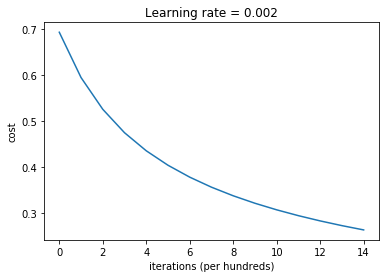

In [41]:
# Evaluate Task 6 (DO NOT change the values of num_iters or alpha)
res = model(X_train, Y_train, X_test, Y_test, num_iters=1500, alpha=0.002, verbose=True)
# Plot learning curve
costs = np.squeeze(res['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Learning rate = 0.002')
plt.show()

### Expected output
&nbsp;|&nbsp;
--|--
Cost after iter 0: |0.6931471805599454
Cost after iter 100: |0.5946773825987639
Cost after iter 200: |0.5256364501984687
Cost after iter 300: |0.4747208768166399
Cost after iter 400: |0.435436416758632
Cost after iter 500: |0.40399872095331557
Cost after iter 600: |0.37811027839268685
Cost after iter 700: |0.35630887692114865
Cost after iter 800: |0.3376209341419335
Cost after iter 900: |0.32137148224069756
Cost after iter 1000: |0.30707586651947666
Cost after iter 1100: |0.29437547177794215
Cost after iter 1200: |0.28299807348845724
Cost after iter 1300: |0.27273248705908887
Cost after iter 1400: |0.26341182071904296
train accuracy: | 94.05594405594405 %
test accuracy: | 88.0 %

<br>
<img src="lc.png">
<br>

In [60]:
# Task 7.
# Calculate TP, FP, TN, FN, Accuracy, Precision, Recall, and F-1 score
# We assume that label y = 1 is positive, and y = 0 is negative
def calc_metrics(Y_test, Y_pred_test):
    """
    Calculate metrics
    
    Args:
    Y_test -- test label
    Y_pred_test -- predictions on test data
    
    Return:
    metrics -- a dict object
    """
    assert(Y_test.shape == Y_pred_test.shape)
    
    ##### START TODO #####
    TP = np.sum(np.logical_and(Y_pred_test == 1, Y_test == 1))
    TN = np.sum(np.logical_and(Y_pred_test == 0, Y_test == 0))
    FP = np.sum(np.logical_and(Y_pred_test == 1, Y_test == 0))
    FN = np.sum(np.logical_and(Y_pred_test == 0, Y_test == 1))
            
    Accuracy = (TP + TN) / (TP + TN + FP + FN)
    Precision = TP / (TP + FP)
    Recall = TP / (TP + FN)
    F1 = (2*(Precision * Recall)) / (Precision + Recall)
    ##### END TODO #####
    
    metrics = {
        'TP': TP,
        'FP': FP,
        'TN': TN,
        'FN': FN,
        'Accuracy': Accuracy,
        'Precision': Precision,
        'Recall': Recall,
        'F1': F1
    }
    
    return metrics

In [61]:
# Evaluate Task 7
m = calc_metrics(Y_test, res['Y_pred_test'])
print('TP = {}, FP = {}, TN = {}, FN = {}, \nAccuracy = {}, Precision = {}, Recall = {}, F1 = {}'.format(
    m['TP'], m['FP'], m['TN'], m['FN'], m['Accuracy'], m['Precision'], m['Recall'], m['F1']
))

TP = 59, FP = 11, TN = 51, FN = 4, 
Accuracy = 0.88, Precision = 0.8428571428571429, Recall = 0.9365079365079365, F1 = 0.887218045112782


### Expected output
&nbsp;|&nbsp;|&nbsp;|&nbsp;
--|--|--|--
TP = 59 | FP = 11 | TN = 51 | FN = 4
Accuracy = 0.88 | Precision = 0.8428571428571429 | Recall = 0.9365079365079365 | F1 = 0.887218045112782